# Import packages:

In [1]:
import TESS_Localize as tl
import astropy.units as u
import lightkurve as lk

# Modes of interest and Target Pixel File setup:

In [2]:
low_frequency_list = [9.51112996, 19.02225993, 28.53338989, 38.04451986, 47.55564982, 57.06677979, 66.57790975, 76.08903972]

In [3]:
high_frequency_list = [500.559, 506.057, 642.255, 740.266, 884.017, 889.556, 957.817, 963.28, 969.013, 1028.729, 1034.356, 1107.713, 1212.297, 1217.872, 1223.429]

In [4]:
search_result = lk.search_targetpixelfile('TIC117070953')
tpf = search_result.download(quality_bitmask='default')

C:\Users\higgi\anaconda3\lib\site-packages\lightkurve\search.py:346: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


# Using TESS_Localize:

* Used in this example to show that two set of signals found in the pipeline aperture can be attributed to entirely different sources

## Examine PCA:

In [6]:
low_pca = tl.PCA(targetpixelfile=tpf, frequencies=low_frequency_list, frequnit=u.uHz, principal_components = 5)

C:\Users\higgi\anaconda3\lib\site-packages\astropy\units\quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


In [7]:
high_pca = tl.PCA(targetpixelfile=tpf, frequencies=high_frequency_list, frequnit=u.uHz, principal_components = 5)

C:\Users\higgi\anaconda3\lib\site-packages\astropy\units\quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
C:\Users\higgi\anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


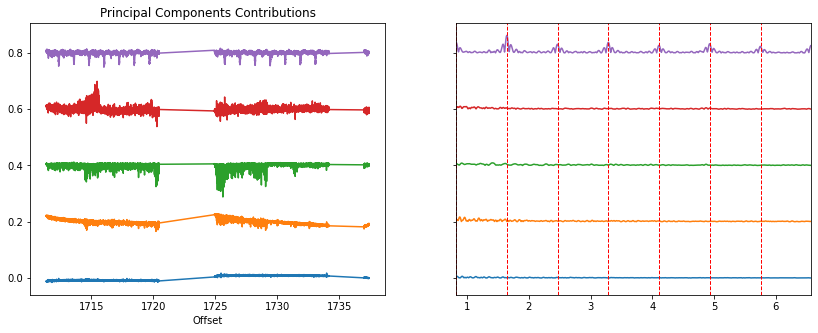

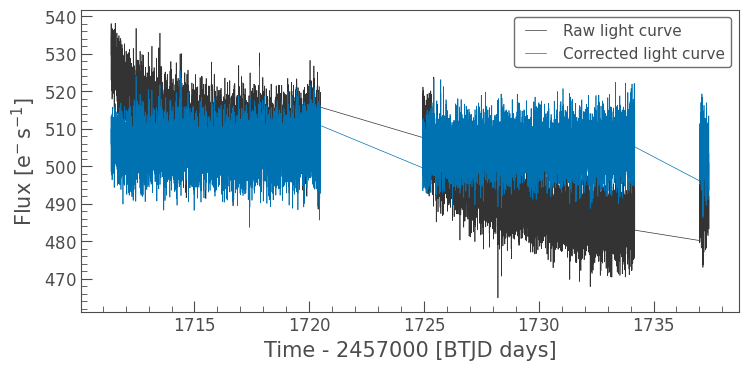

In [8]:
low_pca.plot_pca()

C:\Users\higgi\anaconda3\lib\site-packages\astropy\units\quantity.py:479: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


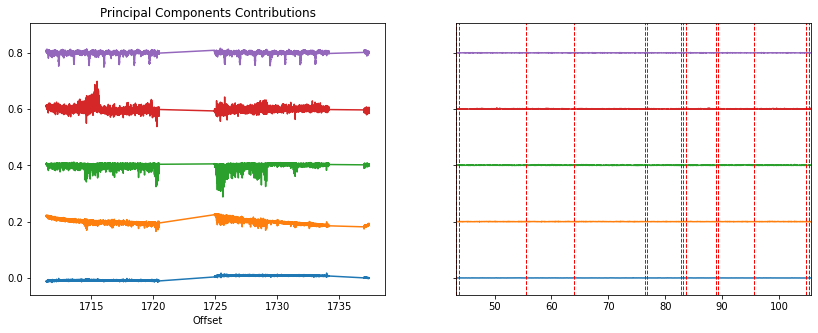

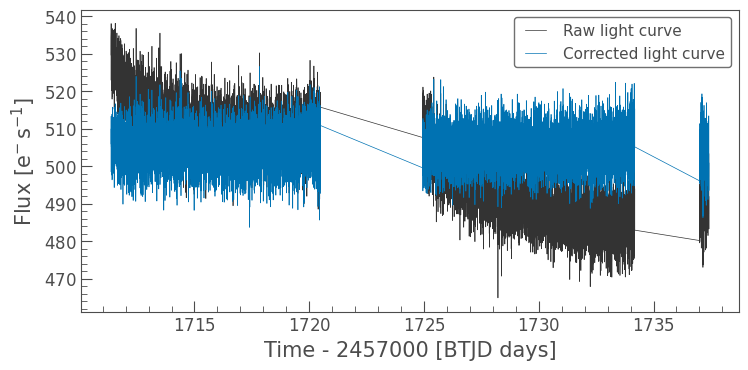

In [9]:
high_pca.plot_pca()

### From these plots we can see power at our frequencies is being removed when the number of principal components are greater than 4.

* If you are unsure of how many principal components to remove in the localization, you can use .autopca. This will provide an estimate in an attempt to ensure no signal of interest is removed in the PCA.

In [10]:
low_pca.autopca

0

In [11]:
high_pca.autopca

5

## Localizing the signal

In [12]:
low = tl.Localize(targetpixelfile=tpf, frequencies=low_frequency_list, frequnit=u.uHz, principal_components = 0)

In [33]:
high = tl.Localize(targetpixelfile=tpf, frequencies=high_frequency_list, frequnit=u.uHz, principal_components = 5)

     index          ra        dec               source          x          y  \
0       89  319.294964  34.196133  1855294415817908480   5.876951   2.998218   
1       92  319.295630  34.196130  1855294415817907840   5.961744   2.957995   
2       75  319.292226  34.192087  1855294312738692480   5.237045   2.537803   
3       98  319.291908  34.201217  1855294415817910144   5.852838   3.964698   
4       86  319.289577  34.200021  1855294312738695296   5.469589   3.919459   
..     ...         ...        ...                  ...        ...        ...   
219     82  319.281108  34.171989  1855294205359143808   2.373989   0.102886   
220     87  319.311307  34.220357  1855294450177649024   9.702034   5.758189   
221     90  319.310871  34.217522  1855294450177648384   9.442744   5.347074   
222     91  319.318528  34.214513  1855294381458168448  10.202716   4.425977   
223    223  319.241740  34.258541  1867305137241296768   3.582052  15.799980   

        Gmag    distance    likelihood 

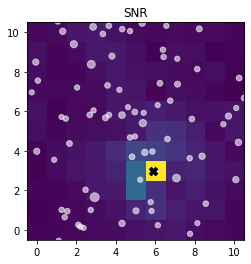

In [14]:
low.info()

     index          ra        dec               source          x          y  \
0      207  319.323517  34.260066  1855295721487976448  14.111563  11.153762   
1      204  319.322245  34.260661  1855295721487976832  13.992307  11.321474   
2      205  319.323988  34.258980  1855295721487975808  14.093529  10.958258   
3      206  319.333264  34.256258  1855295721487972352  15.080277   9.985208   
4      203  319.328505  34.256355  1855295721487973760  14.480724  10.283968   
..     ...         ...        ...                  ...        ...        ...   
219     78  319.304872  34.182061  1855294239716039808   6.129084   0.236514   
220     79  319.280715  34.177708  1855294205358090624   2.735207   1.008287   
221     80  319.278908  34.172149  1855294209659475584   2.104918   0.259083   
222     81  319.300666  34.185115  1855294244019211648   5.812156   0.958683   
223    223  319.241740  34.258541  1867305137241296768   3.582052  15.799980   

        Gmag    distance    likelihood 

c:\users\higgi\tess_localize\TESS_Localize\TESS_Localize.py:736: UserWarning: Frequencies used may not all belong to the same source and provided fit could be unreliable
  warnings.warn('Frequencies used may not all belong to the same source and provided fit could be unreliable')


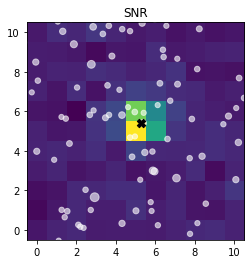

In [34]:
high.info()

In [51]:
import numpy as np
np.where(high.starfit['distance']==high.starfit['distance'].min())

(array([56], dtype=int64),)

In [55]:
high.starfit['likelihood'][4]

4.589429508895245e-37

In [86]:
bb = 10**low.logL(np.vstack((low.gaiadata["x"],low.gaiadata["y"])).T)

In [90]:
cc = 10**high.logL(np.vstack((high.gaiadata["x"],high.gaiadata["y"])).T)

In [91]:
cc/np.sum(cc)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [88]:
bb/np.sum(bb)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [95]:
high.gaiadata['x'],low.gaiadata['x']

(array([ 2.19380326e+00,  6.71669244e-01, -2.51870202e-01,  1.69315703e+00,
         1.43895220e+00,  1.41493487e+00, -2.98798637e+00, -1.70919976e+00,
         1.11308760e+00, -1.75190400e+00,  1.26110324e+00, -2.04897377e+00,
        -3.12754587e+00, -1.35636431e+00, -3.80249525e+00, -4.36176481e+00,
        -4.07920859e+00, -4.11146864e+00, -5.41963422e+00, -4.69089056e+00,
        -4.08265546e+00, -2.18660123e+00, -1.38853686e+00, -2.21243042e+00,
        -3.14865151e+00, -7.42394421e-01, -2.18517300e+00, -3.04415193e+00,
        -1.75404172e+00, -1.19224539e+00, -1.85035629e+00, -6.72596327e-01,
         2.24369401e-03, -2.61864785e+00, -1.52834441e+00, -3.24696304e+00,
        -2.50361264e-01, -3.08354018e+00, -3.13161113e+00, -3.09922670e+00,
        -3.37123402e+00, -1.02200611e+00, -3.07487452e+00, -4.21750518e+00,
        -3.57106600e+00, -3.33210785e+00, -2.64282282e+00, -3.06986616e+00,
         9.81575119e+00,  5.65063956e+00,  6.77100031e+00,  5.55023956e+00,
         6.5